#**1.Introduction**

Although there have been a lot of analyses embarked on in the past on factors influencing life expectancy viewing demographic variables, income composition, and mortality rates. It was found that the effect of immunization and the human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives the motivation to resolve both the factors stated previously by formulating a regression model based on a mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio, and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors, and other health-related factors as well. Since the observations in this dataset are based on different countries, it will be easier for a country to choose the predicting factor which is contributing to the lower value of life expectancy. This will help in suggesting a country which area should be given importance to efficiently improve the life expectancy of its population.


#**2. Method**



#The analysis follows the steps as below.

*     Do various predicting factors which has been chosen initially really affect Life expectancy? What are the predicting variables affecting life expectancy?

*     Should a country having a lower life expectancy value(<65) increase its healthcare expenditure to improve its average lifespan?
  
*     How do Infant and Adult mortality rates affect life expectancy?

*     Does Life Expectancy have a positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol, etc?
    
*     What is the impact of schooling on the lifespan of humans?
    
*     Does Life Expectancy have a positive or negative relationship with drinking alcohol?
    
*     Do densely populated countries tend to have a lower life expectancy?
  
*     What is the impact of Immunization coverage on Life Expectancy?

In [296]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**3.EDA**

In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/drive/MyDrive/DS_Prod/December /Life Expectancy Prediction/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.isnull().sum()

In [ ]:
print(df.shape)

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [304]:
country_with_one_entry = ['Dominica','Tuvalu','Cook Islands','Marshall Islands','Monaco','Saint Kitts and Nevis','Niue','San Marino','Nauru','Palau']
df = df.loc[~df['Country'].isin(country_with_one_entry)].reset_index(drop=True)

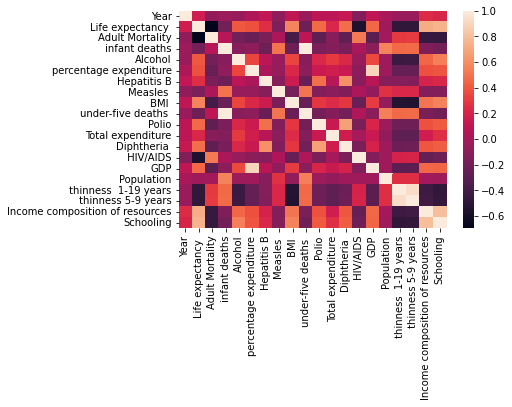

In [305]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

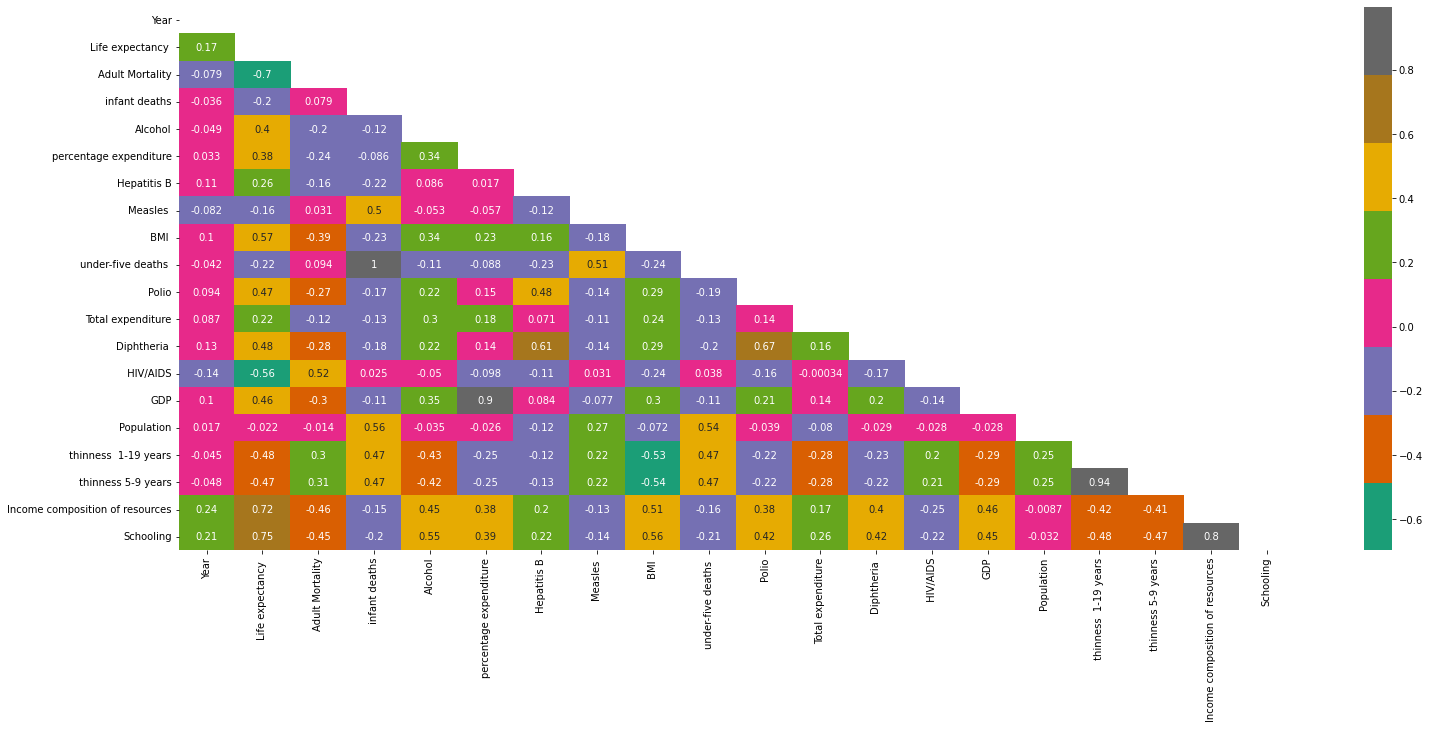

In [306]:
plt.figure(figsize=(25, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, annot=True, cmap='Dark2');

In [307]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Status'] = le.fit_transform(df['Status'])

In [308]:
df.fillna(df.mean(), inplace=True)

#**4. Analyze**

In [309]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,182,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,182,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,182,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,182,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [310]:
x = df.drop(['Life expectancy '], axis=1)
y = df.loc[:,'Life expectancy ']
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [311]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)

array([[-1.72261177,  1.62697843,  0.46034827, ...,  2.76945433,
        -0.72365626, -0.58394089],
       [-1.72261177,  1.41004798,  0.46034827, ...,  2.81405613,
        -0.73828359, -0.61468047],
       [-1.72261177,  1.19311752,  0.46034827, ...,  2.85865792,
        -0.76753824, -0.64542005],
       ...,
       [ 1.72261177, -1.19311752,  0.46034827, ..., -0.79868943,
        -0.97719657, -0.61468047],
       [ 1.72261177, -1.41004798,  0.46034827, ..., -0.70948584,
        -0.97719657, -0.67615962],
       [ 1.72261177, -1.62697843,  0.46034827, ...,  1.40909952,
        -0.94306614, -0.67615962]])

In [312]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

#4. First model Prediction Algorithms:


In [313]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [314]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    print(classification_report(ytest, ypred))
    
    return model

In [315]:
df.dtypes

Country                              int64
Year                                 int64
Status                               int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [316]:
df = df.astype('float64')
print(df.dtypes)

Country                            float64
Year                               float64
Status                             float64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                      float64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                            float64
 BMI                               float64
under-five deaths                  float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


##*1. Lasso Regression*


In [317]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

lasso = Lasso()
lasso.fit(xtrain, ytrain)
lasso_train_score = lasso.score(xtrain, ytrain)
lasso_test_score = lasso.score(xtest, ytest)
lasso_r2_score = r2_score(ytest, lasso.predict(xtest))
lasso_mae = mean_absolute_error(ytest, lasso.predict(xtest))
lasso_mse = mean_squared_error(ytest, lasso.predict(xtest))

##*2.  Linear Regression*


In [318]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr_train_score = lr.score(xtrain, ytrain)
lr_test_score = lr.score(xtest, ytest)
lr_r2_score = r2_score(ytest, lr.predict(xtest))
lr_mae = mean_absolute_error(ytest, lr.predict(xtest))
lr_mse = mean_squared_error(ytest, lr.predict(xtest))


##*3. Ridge regression*

---



In [319]:
ridge = Ridge()
ridge.fit(xtrain, ytrain)
ridge_train_score = ridge.score(xtrain, ytrain)
ridge_test_score = ridge.score(xtest, ytest)
ridge_r2_score = r2_score(ytest, ridge.predict(xtest))
ridge_mae = mean_absolute_error(ytest, ridge.predict(xtest))
ridge_mse = mean_squared_error(ytest, ridge.predict(xtest))

##*4. Ada Boost regressor*

---



In [320]:
abr = AdaBoostRegressor()
abr.fit(xtrain, ytrain)
abr_train_score = abr.score(xtrain, ytrain)
abr_test_score = abr.score(xtest, ytest)
abr_r2_score = r2_score(ytest, abr.predict(xtest))
abr_mae = mean_absolute_error(ytest, abr.predict(xtest))
abr_mse = mean_squared_error(ytest, abr.predict(xtest))

##*5. Gradient Boosting Regressor*

---



In [321]:
gbr = GradientBoostingRegressor()
gbr.fit(xtrain, ytrain)
gbr_train_score = gbr.score(xtrain, ytrain)
gbr_test_score = gbr.score(xtest, ytest)
gbr_r2_score = r2_score(ytest, gbr.predict(xtest))
gbr_mae = mean_absolute_error(ytest, gbr.predict(xtest))
gbr_mse = mean_squared_error(ytest, gbr.predict(xtest))

##*6.Random Forest Regressor*

---



In [322]:
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)
rfr_train_score = rfr.score(xtrain, ytrain)
rfr_test_score = rfr.score(xtest, ytest)
rfr_r2_score = r2_score(ytest, rfr.predict(xtest))
rfr_mae = mean_absolute_error(ytest, rfr.predict(xtest))
rfr_mse = mean_squared_error(ytest, rfr.predict(xtest))

##*7. Decision Tree Regressor*

---



In [323]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)
dtr_train_score = dtr.score(xtrain, ytrain)
dtr_test_score = dtr.score(xtest, ytest)
dtr_r2_score = r2_score(ytest, dtr.predict(xtest))
dtr_mae = mean_absolute_error(ytest, dtr.predict(xtest))
dtr_mse = mean_squared_error(ytest, dtr.predict(xtest))

##*8. XG Boost Regressor*

---



In [324]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)
xgb_train_score = xgb.score(xtrain, ytrain)
xgb_test_score = xgb.score(xtest, ytest)
xgb_r2_score = r2_score(ytest, xgb.predict(xtest))
xgb_mae = mean_absolute_error(ytest, xgb.predict(xtest))
xgb_mse = mean_squared_error(ytest, xgb.predict(xtest))

[11:07:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


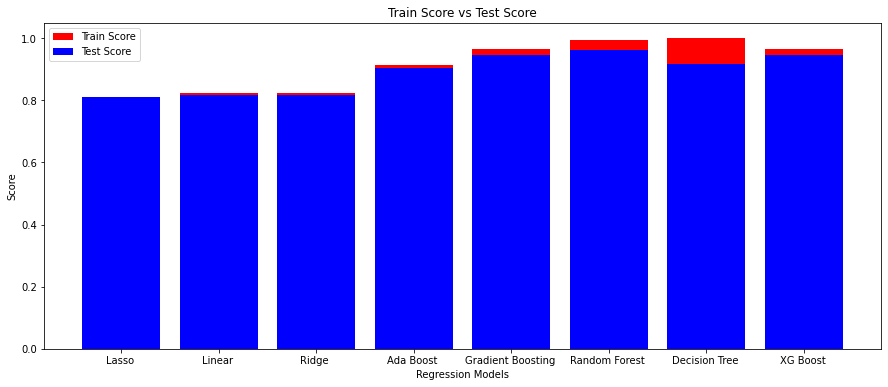

In [325]:
plt.figure(figsize=(15, 6))
plt.bar(x=["Lasso ", "Linear ", "Ridge ", "Ada Boost ", "Gradient Boosting ", "Random Forest ", "Decision Tree ", "XG Boost "], height=[lasso_train_score, lr_train_score, ridge_train_score, abr_train_score, gbr_train_score, rfr_train_score, dtr_train_score, xgb_train_score], color="red", label="Train Score")
plt.bar(x=["Lasso ", "Linear ", "Ridge ", "Ada Boost ", "Gradient Boosting ", "Random Forest ", "Decision Tree ", "XG Boost "], height=[lasso_test_score, lr_test_score, ridge_test_score, abr_test_score, gbr_test_score, rfr_test_score, dtr_test_score, xgb_test_score], color="blue", label="Test Score")
plt.legend()
plt.title("Train Score vs Test Score")
plt.xlabel("Regression Models")
plt.ylabel("Score")
plt.show()

In [326]:
names = ['Lasso','LinReg','Reidge','ADABoost','GradientBoost','RandomForest','DecisionTree','XGBoost']
score =[lasso_train_score, lr_train_score, ridge_train_score, abr_train_score, gbr_train_score, rfr_train_score, dtr_train_score, xgb_train_score]

In [327]:
scores = pd.DataFrame({'Algorithm Name':names,'Score':score})

In [328]:
scores

,Algorithm Name,Score
0,Lasso,0.811573
1,LinReg,0.822027
2,Reidge,0.822022
3,ADABoost,0.914537
4,GradientBoost,0.963564
5,RandomForest,0.994637
6,DecisionTree,1.000000
7,XGBoost,0.964353
